Creates a zoomable miniapp to display the islands in 3d.

In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

# Importing packages
* matplotlib.pyplot creates plots.
* mpl_toolkits.mplot3d creates 3d plots.
* numpy has multiple mathematical functions.
* time can be used to time how long each task takes.
* random provides random number generators.

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import time as t

# Importing other python files

* capCreator makes caps as x, y, z arrays to be displayed on a 3d plot.
* brownianMotion generates lists of brownian motion angles that will govern the position of caps.
* hammerProjection projects the caps to x, y arrays to be displayed on a 2d plot.

In [3]:
import capCreator as cC
import brownianMotion as bM
import hammerProjection as hP

# Edit values in this cell to change the output of the code

In [4]:
# Input radius of the sphere the caps will be on. Leaving it on 1 is fine.
radius = 1

# Resolution determines how many points the caps will have. At 0, the island reverts to a circle.
resolution = 0

# The number of caps the code will produce.
capCount = 5

# The Wiener process parameter.
delta = 0.3

# Total time.
T = 10.0

# Number of steps.
N = 30

# Display latitudes?
dispLat = True

# Display longitudes?
dispLong = True

# Choose the time to display here:
timeStep = 30

# Creating caps for 3d display

In [5]:
# Array in which the caps will be stored for 3d display.
# This will contain caps that are lists of positions of caps over time.
caps = []

# Time step size.
dt = T/N

# Start time.
start = t.time()

for i in range(capCount):
    
    # This array will temporarily store the position of a single cap at all times.
    cap = []
    
    # Theta of the cap.
    theta = np.pi/8 # THIS SHOULD BE RANDOM (TBD).
    
    # Color of the cap.
    color = (0, 0, 0) # THIS SHOULD BE RANDOM (TBD).
 
    # Initial euler angles of island.
    anglesList = np.empty((3,N+1))
    
    anglesList[:, 0] = 0 # THIS SHOULD BE RANDOM (TBD).
    
    
    # Creating list of brownian angles and transposing it so capCreator can use it.
    bM.brownian(anglesList[:,0], N, dt, delta, out=anglesList[:,1:])
    
    anglesList = np.transpose(anglesList)
    
    # Making all positions of the cap.
    for angles in anglesList:
        
        # Using capCreator to make a random cap and adding it to the array caps.
        cap.append(cC.createCap(theta, radius, angles, resolution, color))
    
    # Saving array 'cap' to caps.
    caps.append(cap)
    
# Transposing caps so it is a list of times with caps inside.
caps = np.transpose(caps)

# End time.
end = t.time()

# Storing how long creation took.
creationTime = end - start

# Display how long it took to create the caps.
print("Created " + str(capCount) + " caps in " + str(creationTime) + " second(s).")

Created 5 caps in 0.029776573181152344 second(s).


# Projecting these caps to a 2d plane

In [6]:
# Array in which the caps will be stored for 2d display.
# This is a list of times containing lists of projected caps of x and y arrays.
capProjections = []

# Start time.
start = t.time()

for time in caps:
    
    # This will temporarily store projections of caps at a specific time.
    timeProjection = []
    
    for cap in time:
    
        # Using hammerProjection to project these caps onto a plot.
        xh, yh, color = hP.projectCap(cap, radius)
    
        # Adding these projected caps to the array capProjections.
        timeProjection.append([xh, yh, color])    
    
    capProjections.append(timeProjection)

# End time.
end = t.time()

# Storing how long projection took.
projectionTime = end - start

# Display how long it took to project the caps.
print("Projected " + str(capCount) + " caps in " + str(projectionTime) + " second(s).")

Projected 5 caps in 0.009993791580200195 second(s).


# Adding latitudes to 3d display

In [7]:
# Start time
start = t.time()

# Decide the number of lines to display. The north and south poles account for 1 each.
latLines = 7

# Number of points or vertices in the lines.
latDots = 60

latHorizontal = np.linspace(0, 2 * np.pi, latDots + 1)
latVertical = np.linspace(0, np.pi, latLines)

xLats = np.outer(np.cos(latHorizontal), np.sin(latVertical))
yLats = np.outer(np.sin(latHorizontal), np.sin(latVertical))
zLats = np.outer(np.ones(latDots + 1), np.cos(latVertical))

# End time.
end = t.time()

# Storing how long latitude creation took.
latitudeTime = end - start

# Display how long it took to create latitudes.
print("Created latitudes in " + str(latitudeTime) + " second(s).")

Created latitudes in 0.0 second(s).


# Adding longitudes to 3d display

In [8]:
# Start time
start = t.time()

# Decide the number of lines to display. The north and south poles account for 1 each.
longLines = 8

# Number of points or vertices in the lines.
longDots = 60

longHorizontal = np.linspace(0, 2 * np.pi, longLines + 1)
longVertical = np.linspace(0, np.pi, longDots)

xLongs = np.outer(np.cos(longHorizontal), np.sin(longVertical))
yLongs = np.outer(np.sin(longHorizontal), np.sin(longVertical))
zLongs = np.outer(np.ones(longLines + 1), np.cos(longVertical))

# End time.
end = t.time()

# Storing how long latitude creation took.
longitudeTime = end - start

# Display how long it took to create longitudes.
print("Created longitudes in " + str(longitudeTime) + " second(s).")

Created longitudes in 0.0 second(s).


# Projecting lines to 2d

In [9]:
# Start time
start = t.time()

# This color variable is not being used.
projLinesColor = (255, 0, 0)
xProjLats, yProjLats, projLinesColor = hP.project(xLats, yLats, zLats, projLinesColor, radius)
xProjLongs, yProjLongs, projLinesColor = hP.project(xLongs, yLongs, zLongs, projLinesColor, radius)

# End time.
end = t.time()

# Storing how long projection took.
lineProjectionTime = end - start

# Display how long it took to create longitudes.
print("Projected lines in " + str(lineProjectionTime) + " second(s).")

Projected lines in 0.004936695098876953 second(s).


# Displaying the caps in 3d

<IPython.core.display.Javascript object>


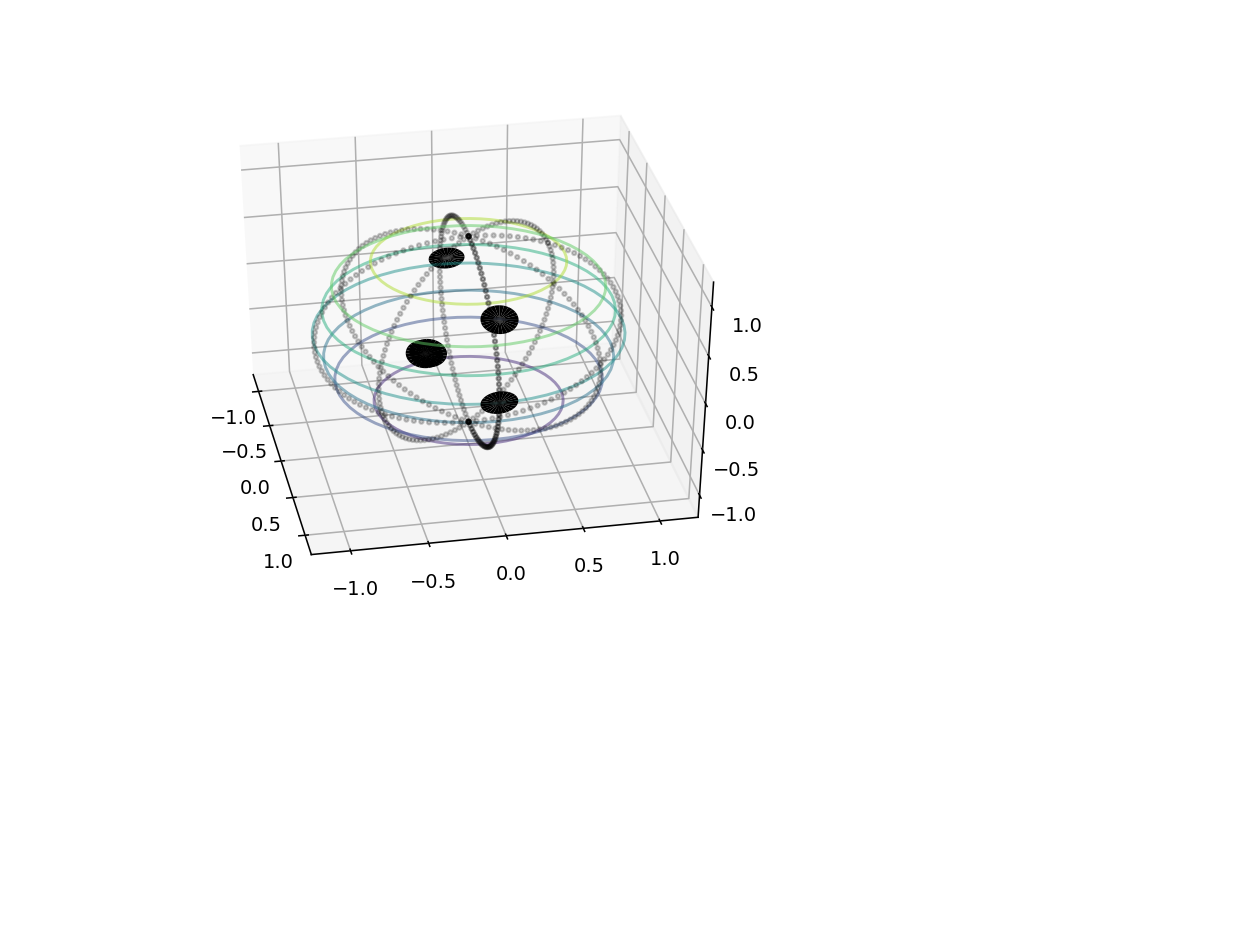

In [10]:
# Creating new figure to display graph in 3d.
fig1 = plt.figure()
ax3d = fig1.add_subplot(111, projection='3d')

# Changing the limits of the axes.
ax3d.set_xlim(-1.2, 1.2)
ax3d.set_ylim(-1.2, 1.2)
ax3d.set_zlim(-1.2, 1.2)

# Plotting each cap at a specific time.

# Displaying all caps at that time.
for capIndex in range(len(caps[0])):
    ax3d.plot_surface(caps[timeStep][capIndex].x, caps[timeStep][capIndex].y, caps[timeStep][capIndex].z, rstride = 4, cstride = 4, alpha = 1, color = caps[timeStep][capIndex].color)

if dispLat:
    ax3d.contour(xLats, yLats, zLats, alpha = 0.5)
if dispLong:
    ax3d.scatter(xLongs, yLongs, zLongs, marker = '.', alpha = 0.2, color = 'k')
    
# Displaying the graph.
plt.show()

# Displaying the caps in 2d

<IPython.core.display.Javascript object>


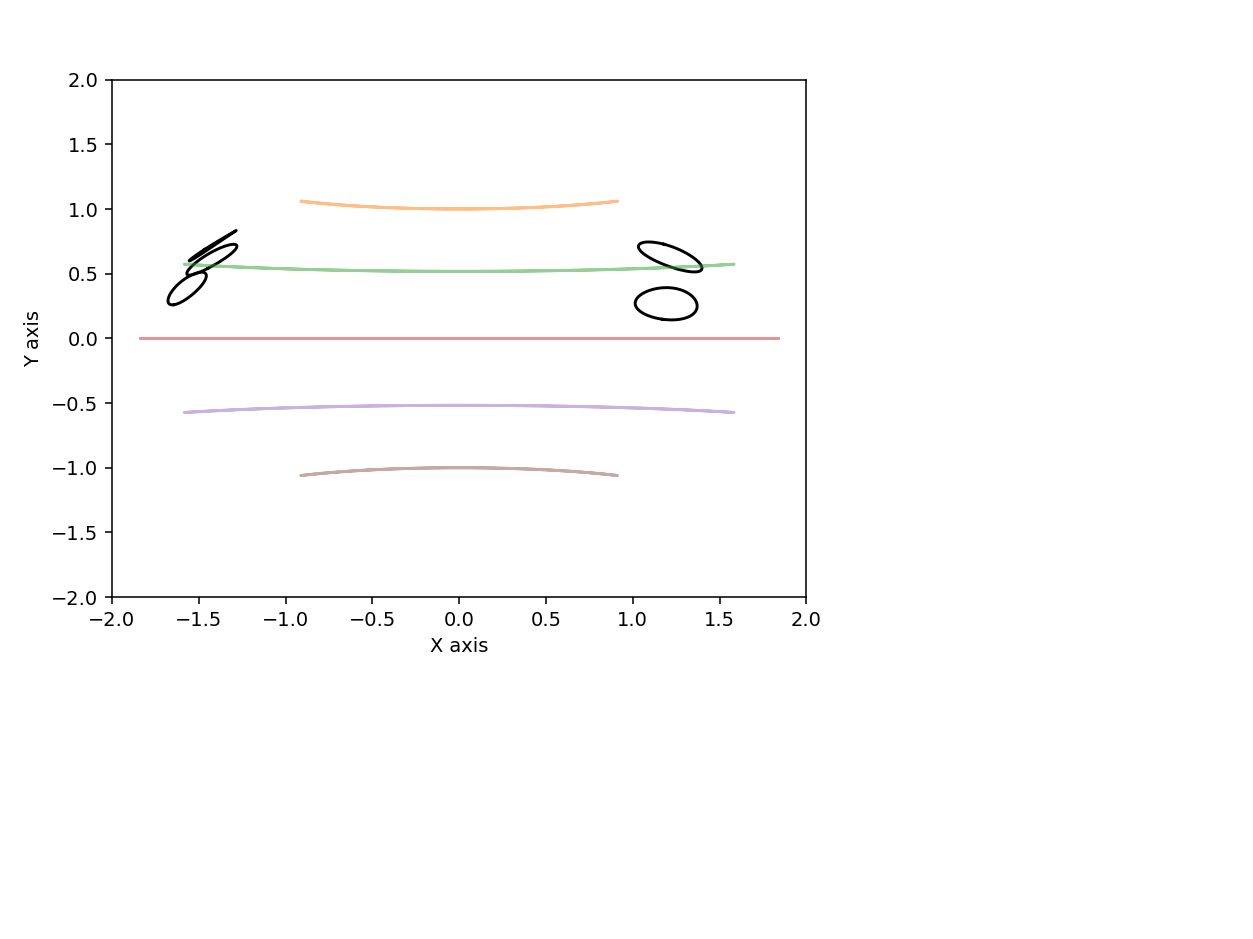

In [11]:
# Choose the timeStep to be displayed here.
timeStep = 20

# Creating new figure to display graph in 2d.
fig2 = plt.figure()

# Changing the limits of the axes.
plt.xlim(-2, 2)
plt.ylim(-2, 2)

# Plotting each cap at the timeStep.
for capIndex in range(len(capProjections[0])):
    plt.plot(capProjections[timeStep][capIndex][0], capProjections[timeStep][capIndex][1], color = capProjections[timeStep][capIndex][2])

# Plotting the lines.
if dispLat:
    plt.plot(xProjLats, yProjLats, alpha = 0.5)
if dispLong:
    1 + 1
    #plt.plot(xProjLongs, yProjLongs, alpha = 0.5)
    
# Adding labels to the axes
plt.xlabel('X axis')
plt.ylabel('Y axis')

# Displaying the graph
plt.show()

In [12]:
# Storing how long tasks took.
totalTime = creationTime + projectionTime + latitudeTime + longitudeTime + lineProjectionTime

# Display how long the notebook took.
print("Completed operations in " + str(totalTime) + " second(s).")

Completed operations in 0.04470705986022949 second(s).
